<a href="https://colab.research.google.com/github/dbsgh3344/kaggle_study/blob/master/dacon_jejucard/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os 
os.chdir('/content/drive/My Drive/kaggle_study/dacon_jejucard')

In [ ]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


In [ ]:
#FLC : 가구생애주기 (1: 1인가구, 2: 영유아자녀가구, 3: 중고생자녀가구, 4: 성인자녀가구, 5: 노년가구)


In [ ]:
import time
st = time.time()
data = pd.read_csv('201901-202003.csv')
print(data.shape)
print(time.time()-st)
data.head()

(24697792, 12)
49.74865198135376


,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3


In [ ]:
data

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3
...,...,...,...,...,...,...,...,...,...,...,...,...
24697787,202003,충북,충주시,휴양콘도 운영업,충북,충주시,30s,1,2,3,43300,4
24697788,202003,충북,충주시,휴양콘도 운영업,충북,충주시,40s,1,3,3,35000,3
24697789,202003,충북,충주시,휴양콘도 운영업,충북,충주시,50s,1,4,4,188000,6
24697790,202003,충북,충주시,휴양콘도 운영업,충북,충주시,50s,2,4,4,99000,6


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24697792 entries, 0 to 24697791
Data columns (total 12 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   REG_YYMM      int64 
 1   CARD_SIDO_NM  object
 2   CARD_CCG_NM   object
 3   STD_CLSS_NM   object
 4   HOM_SIDO_NM   object
 5   HOM_CCG_NM    object
 6   AGE           object
 7   SEX_CTGO_CD   int64 
 8   FLC           int64 
 9   CSTMR_CNT     int64 
 10  AMT           int64 
 11  CNT           int64 
dtypes: int64(6), object(6)
memory usage: 2.2+ GB


In [ ]:
data['year_month']=pd.to_datetime(data['REG_YYMM'],format='%Y%m').dt.to_period('M')

In [ ]:
years = pd.to_datetime(data['REG_YYMM'],format='%Y%m',).dt.year
months = pd.to_datetime(data['REG_YYMM'],format='%Y%m').dt.month

In [ ]:
data['year'] = years
data['month'] = months

In [ ]:
submission = pd.read_csv('submission.csv')
print(submission.shape)
submission.head()

(1394, 5)


,id,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,0,202004,강원,건강보조식품 소매업,0
1,1,202004,강원,골프장 운영업,0
2,2,202004,강원,과실 및 채소 소매업,0
3,3,202004,강원,관광 민예품 및 선물용품 소매업,0
4,4,202004,강원,그외 기타 분류안된 오락관련 서비스업,0


# 전체 eda

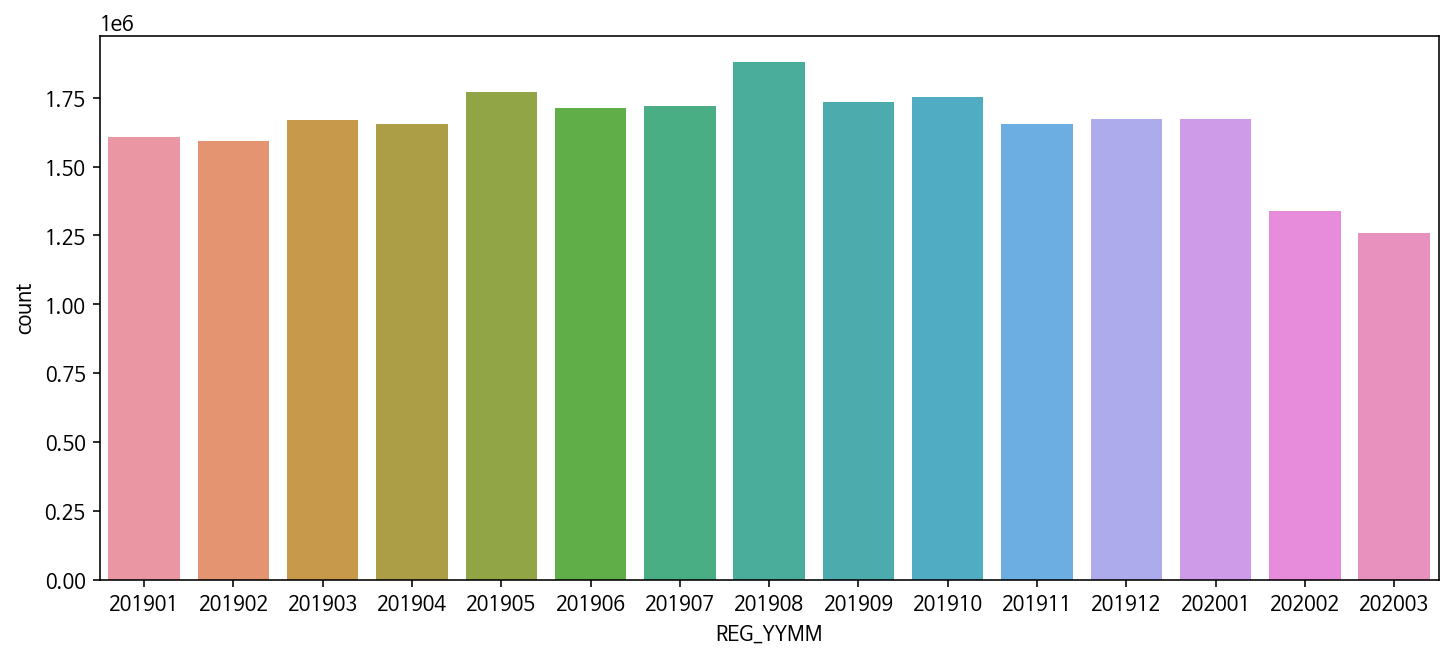

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data['REG_YYMM'])

In [ ]:
data['CARD_SIDO_NM'].value_counts()

서울    6259502
경기    5188230
부산    2030810
인천    1278410
강원    1230355
경남    1222818
경북    1204831
충남    1178159
충북     834707
전북     829466
전남     819291
대구     758424
대전     523121
제주     497503
광주     432150
울산     322802
세종      87213
Name: CARD_SIDO_NM, dtype: int64

In [ ]:
data['CARD_CCG_NM'].value_counts()

중구     1185474
남구      512319
동구      509407
서구      501952
강서구     490111
        ...   
청양군      13894
신안군      10296
울릉군      10210
봉화군       9841
영양군       5728
Name: CARD_CCG_NM, Length: 226, dtype: int64

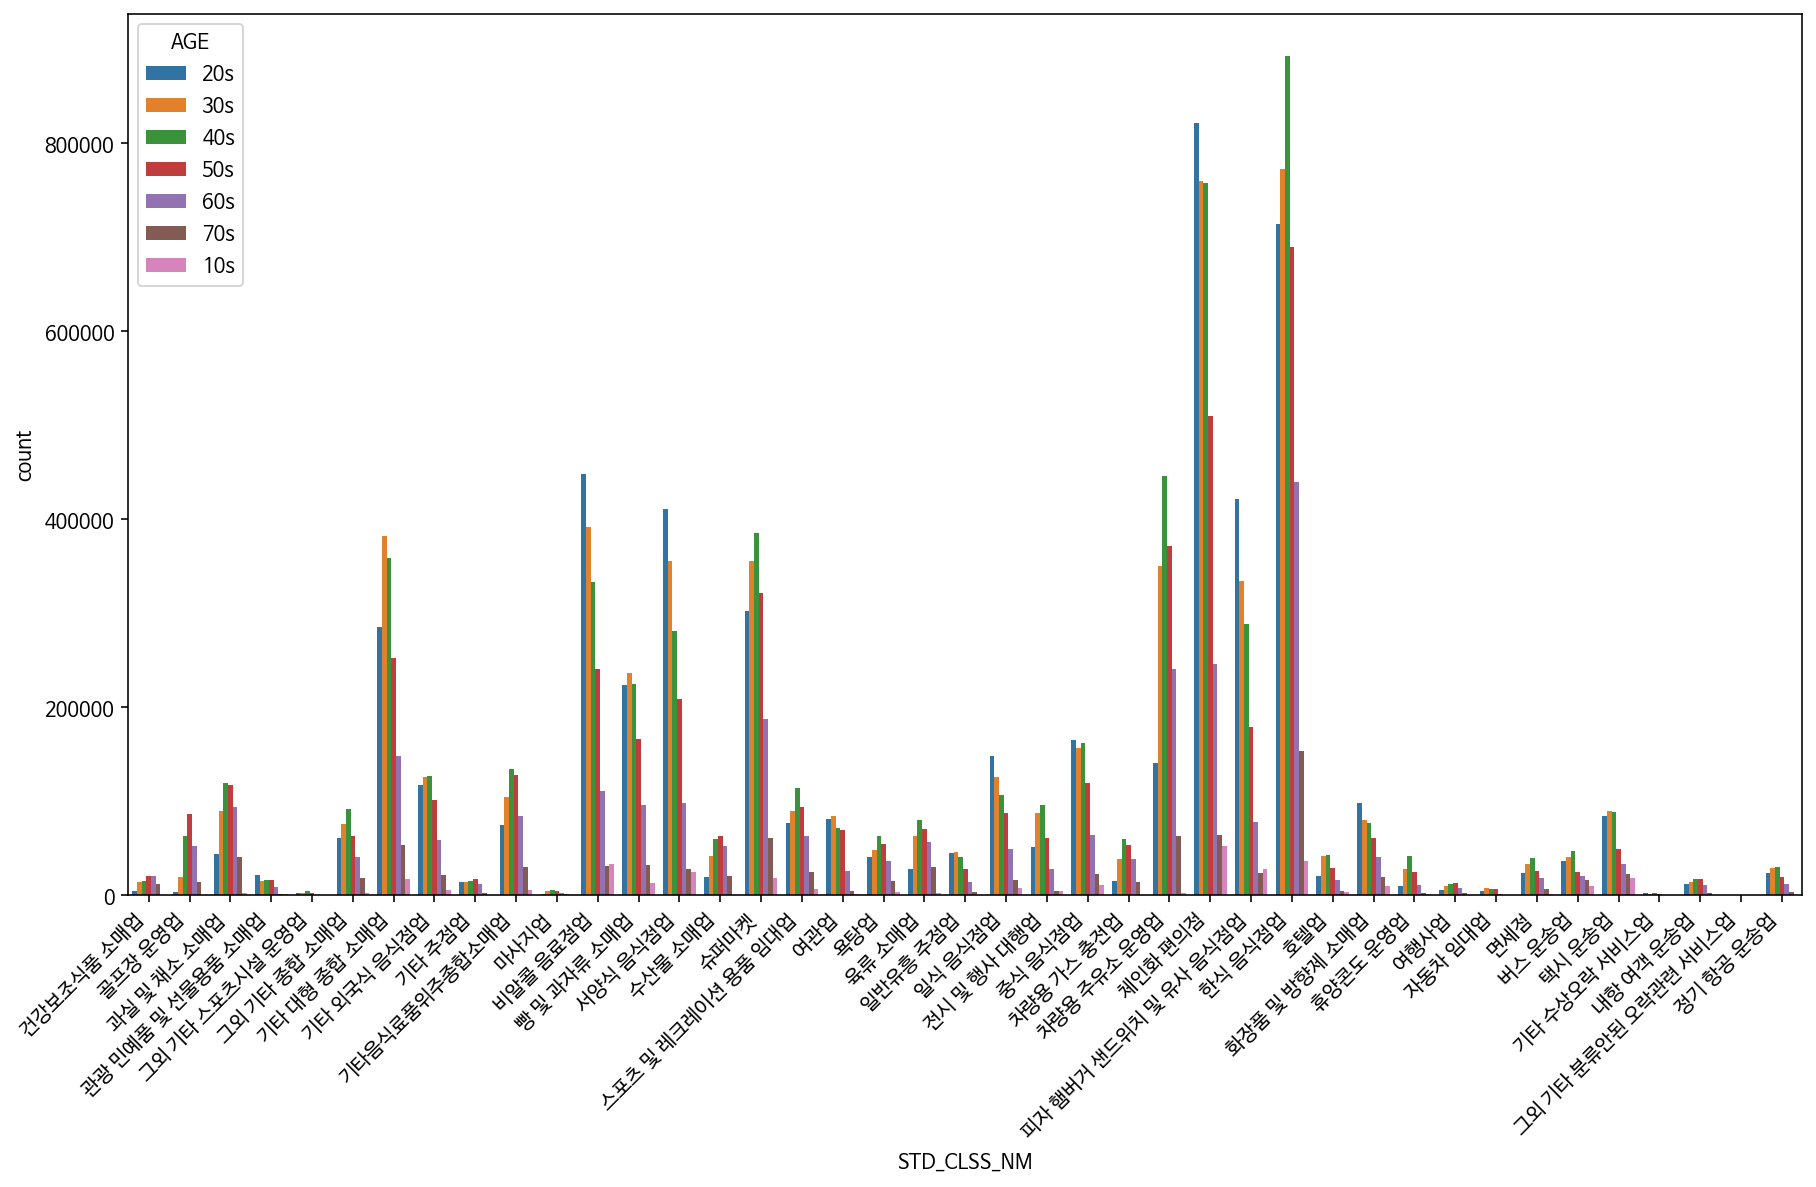

In [ ]:
fig = plt.figure(figsize=(15,9))
sns.countplot(data['STD_CLSS_NM'],hue=data['AGE'])
fig.autofmt_xdate(rotation=45)
plt.show()

- 전체 이용건수는 한식 음식점업이 가장 많고 다음은 체인화 편의점이 많다.
- 한식 음식점업은 40대가 많이 이용했고 편의점은 20대가 많이 이용했다.


In [ ]:
len(data['STD_CLSS_NM'].unique())

41

In [ ]:
diff_card_hom = data[data['CARD_SIDO_NM'] != data['HOM_SIDO_NM']]

In [ ]:
diff_card_hom.STD_CLSS_NM.value_counts()

한식 음식점업                  2733275
체인화 편의점                  2328176
차량용 주유소 운영업              1009168
슈퍼마켓                      994553
비알콜 음료점업                  992525
기타 대형 종합 소매업              896061
서양식 음식점업                  850670
피자 햄버거 샌드위치 및 유사 음식점업     809148
빵 및 과자류 소매업               530249
중식 음식점업                   309358
기타음식료품위주종합소매업             287774
택시 운송업                    269036
과실 및 채소 소매업               248843
일식 음식점업                   238526
스포츠 및 레크레이션 용품 임대업        222060
기타 외국식 음식점업               220267
전시 및 행사 대행업               219932
그외 기타 종합 소매업              208109
버스 운송업                    159680
화장품 및 방향제 소매업             156037
여관업                       155668
골프장 운영업                   147465
면세점                       117940
수산물 소매업                   114704
정기 항공 운송업                  99767
휴양콘도 운영업                   93997
호텔업                        93814
육류 소매업                     88928
욕탕업                        70664
차량용 가스 충전업                 68827
내항 여객 운송업 

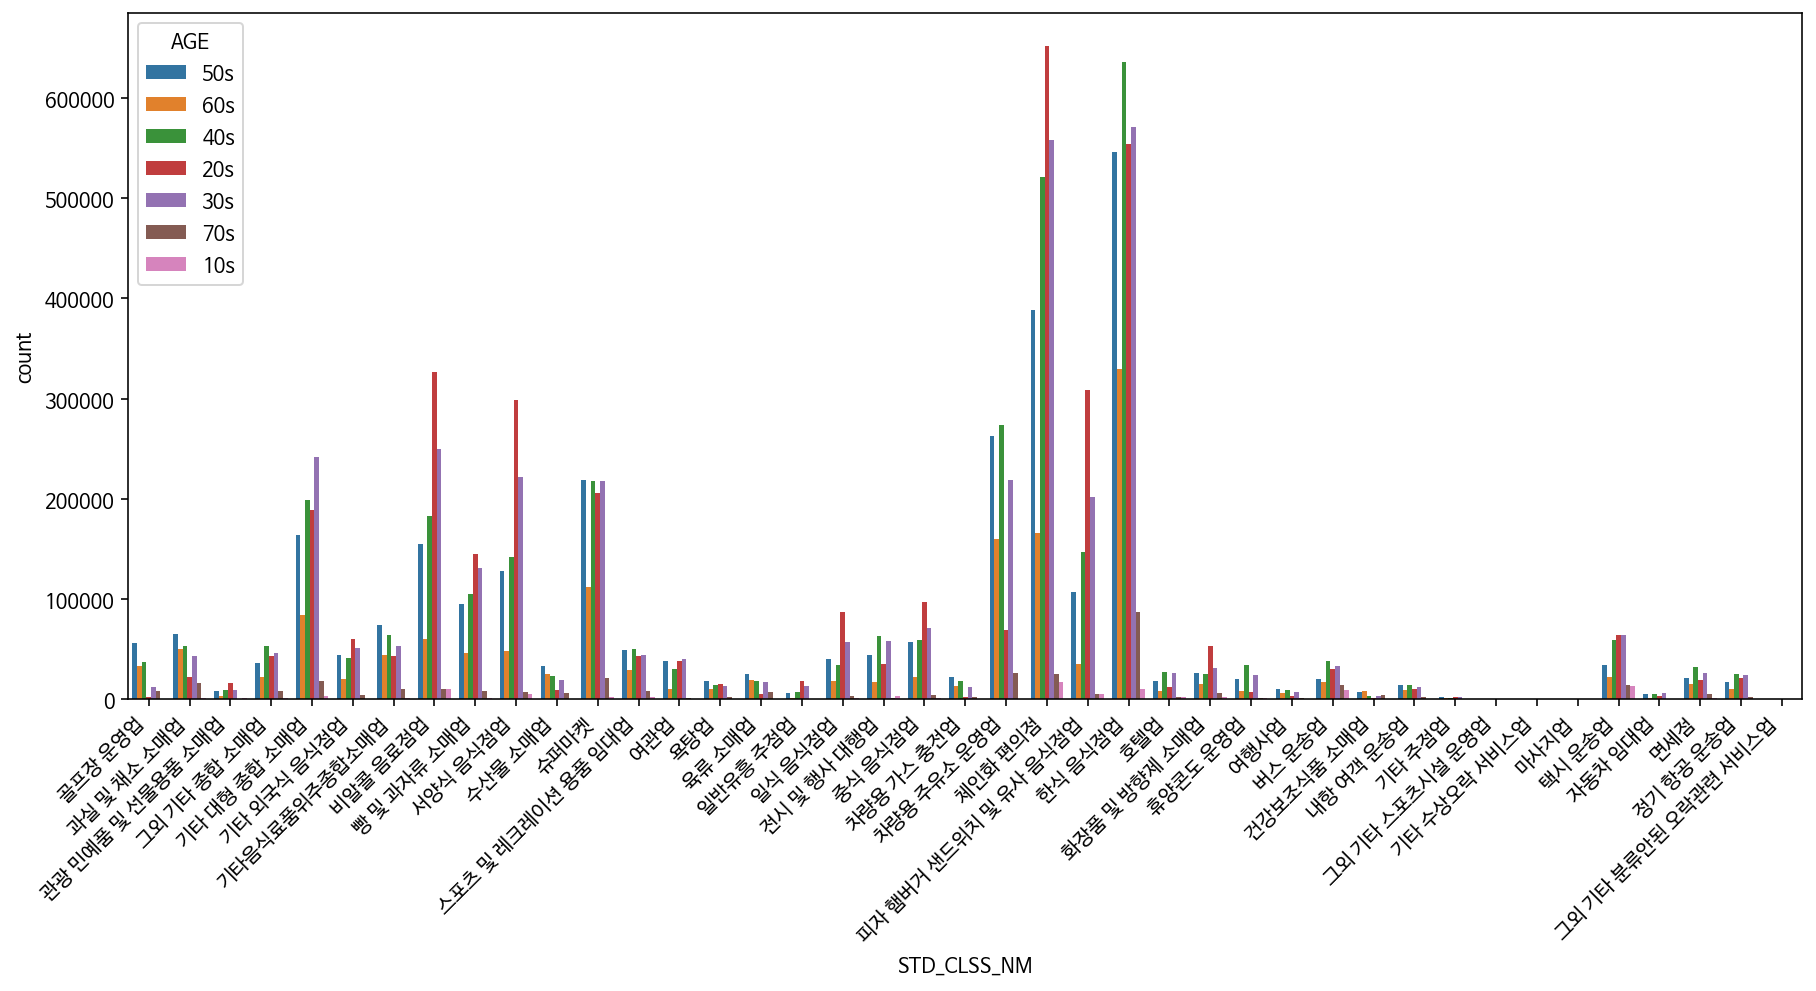

In [ ]:
fig = plt.figure(figsize=(15,7))
sns.countplot(diff_card_hom['STD_CLSS_NM'],hue=diff_card_hom['AGE'])
fig.autofmt_xdate(rotation=45)

In [ ]:
len(diff_card_hom[diff_card_hom['STD_CLSS_NM']=='수산물 소매업'])/len(diff_card_hom)

0.00765890880313792

## 지역별 가장 높은 업종

In [ ]:
sns.countplot(data.loc[data['CARD_SIDO_NM'] =='강원','STD_CLSS_NM'])

In [ ]:
data[['AMT']].groupby(data['CARD_SIDO_NM']).sum().values[:,0]

array([ 1589611299919, 14201885234869,  3485130029864,  2767620595248,
        1705650360934,  3020064352604,  1128913460716,  4491306031541,
       14677131049031,   204045817348,  1255213605740,  3056247462913,
        1839760777139,  1961230185341,  1343582224768,  2103197375108,
        1465437185923])

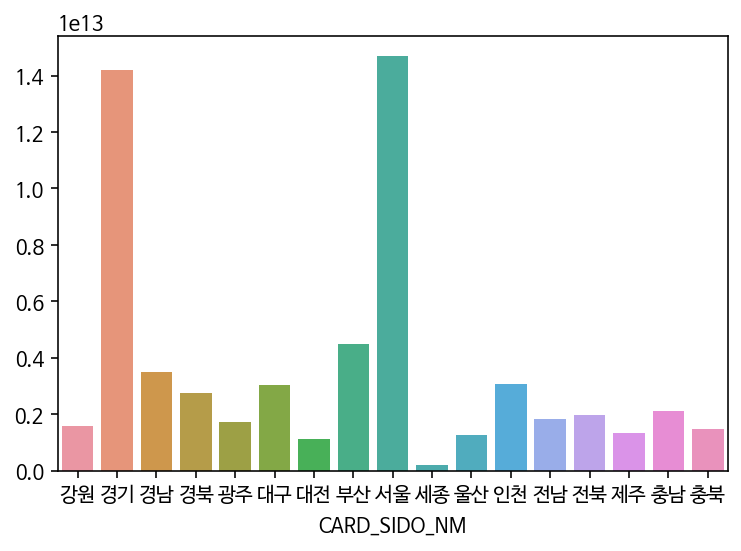

In [ ]:
sns.barplot(x= data[['AMT']].groupby(data['CARD_SIDO_NM']).sum().index, y=data[['AMT']].groupby(data['CARD_SIDO_NM']).sum().values[:,0])

In [ ]:
data.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,year,month,year_month
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4,2019,1,2019-01
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8,2019,1,2019-01
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6,2019,1,2019-01
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5,2019,1,2019-01
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3,2019,1,2019-01


In [ ]:
m_std_amt = data.groupby(['month','STD_CLSS_NM']).sum()[['AMT']]

In [ ]:
# import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(data['month'],data['STD_CLSS_NM'],zdir=data['AMT'])

In [ ]:
data['REG_YYMM'].unique()[0]

## 계절 col

In [ ]:

 

season = data['month'].map({12:1,1:1,2:1,
                   3:2,4:2,5:2,
                   6:3,7:3,8:3,
                   9:4,10:4,11:4})

In [ ]:
season

0           1
1           1
2           1
3           1
4           1
           ..
24697787    2
24697788    2
24697789    2
24697790    2
24697791    2
Name: month, Length: 24697792, dtype: int64

In [ ]:
data['season'] = season

In [ ]:
data.loc[data['year']==2020,'season'] = data.loc[(data['year']==2020),'season'].map({1:201,2:202,3:203,4:204})

In [ ]:
data.season.value_counts()

3      5314345
4      5138824
2      5096567
1      4875679
201    3011869
202    1260508
Name: season, dtype: int64

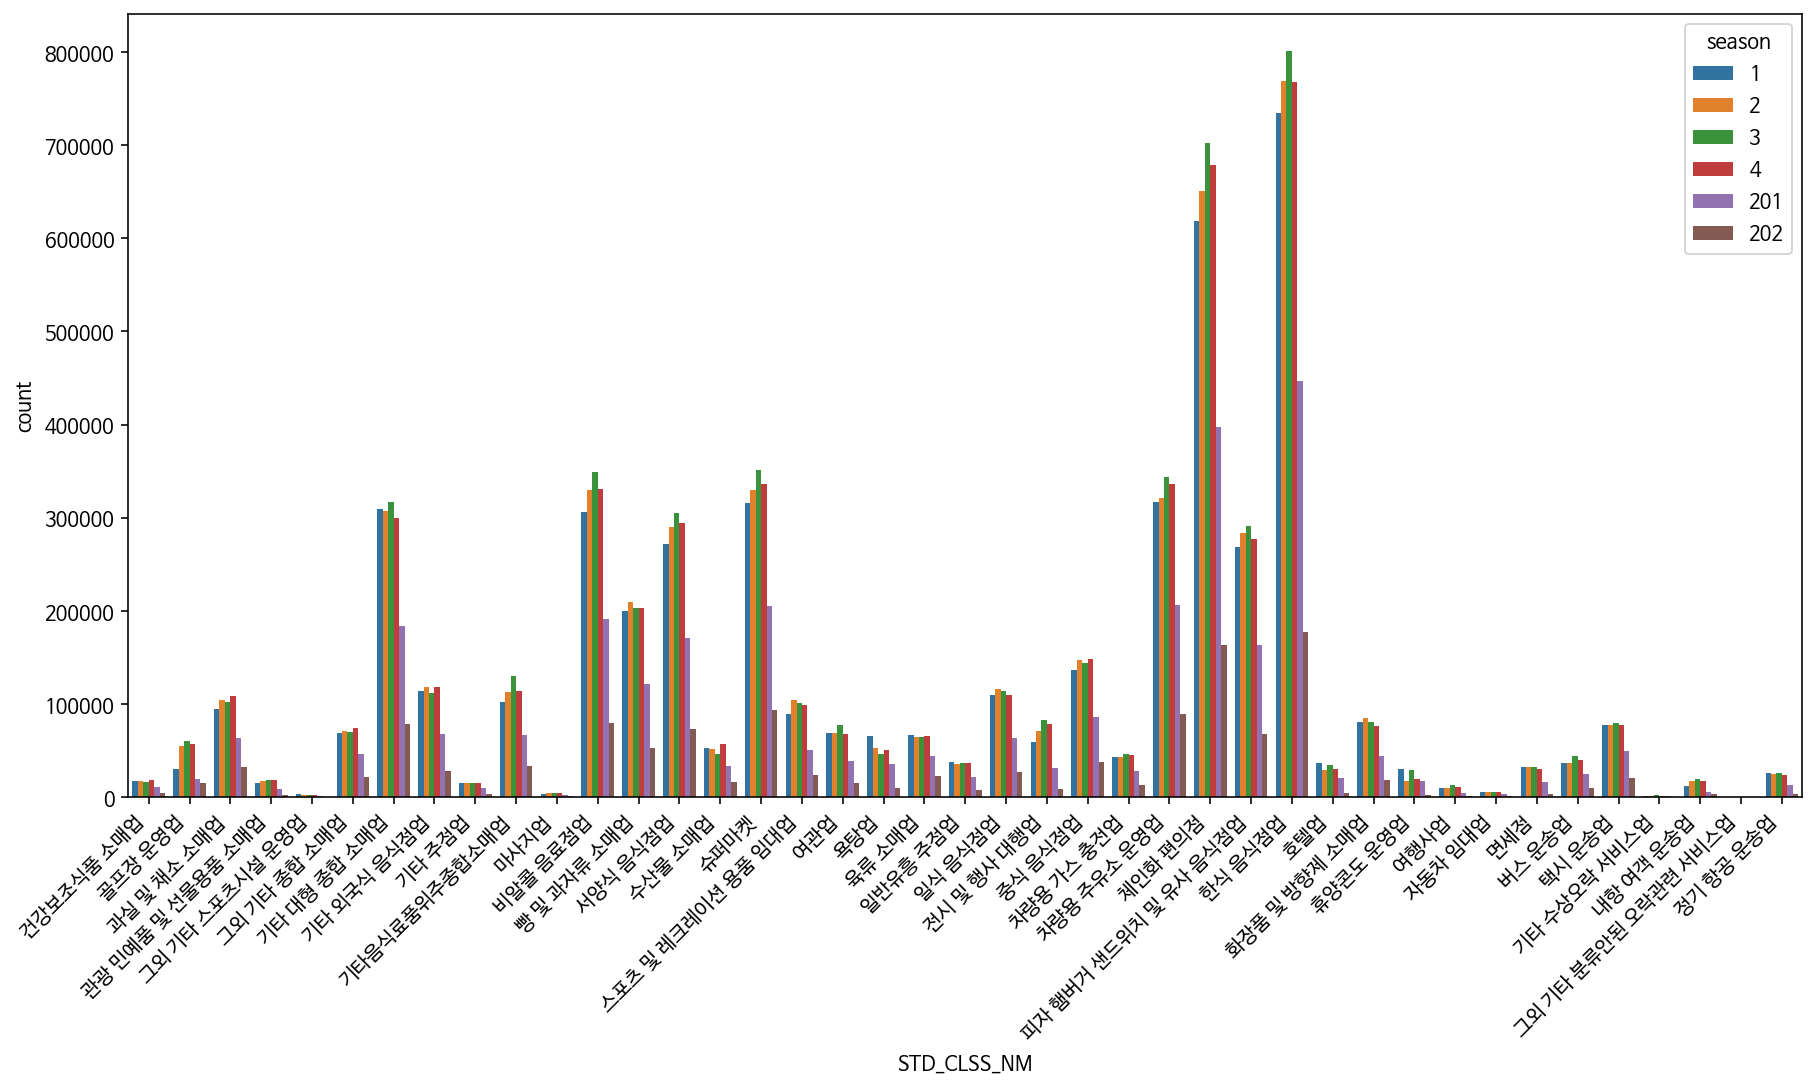

In [ ]:
fig = plt.figure(figsize=(15,8))
sns.countplot(data['STD_CLSS_NM'],hue=data['season'])
fig.autofmt_xdate(rotation=45)

# 제주

In [ ]:
jeju=data[data['CARD_SIDO_NM']=='제주']

In [ ]:
jeju.shape

(497503, 14)

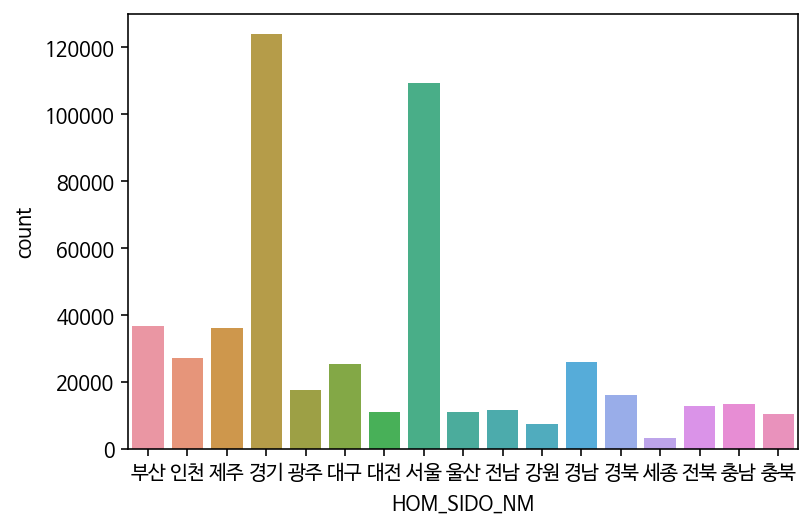

In [ ]:
sns.countplot(jeju['HOM_SIDO_NM'])

- 제주에선 경기, 서울 거주자가 가장 많이 지출함


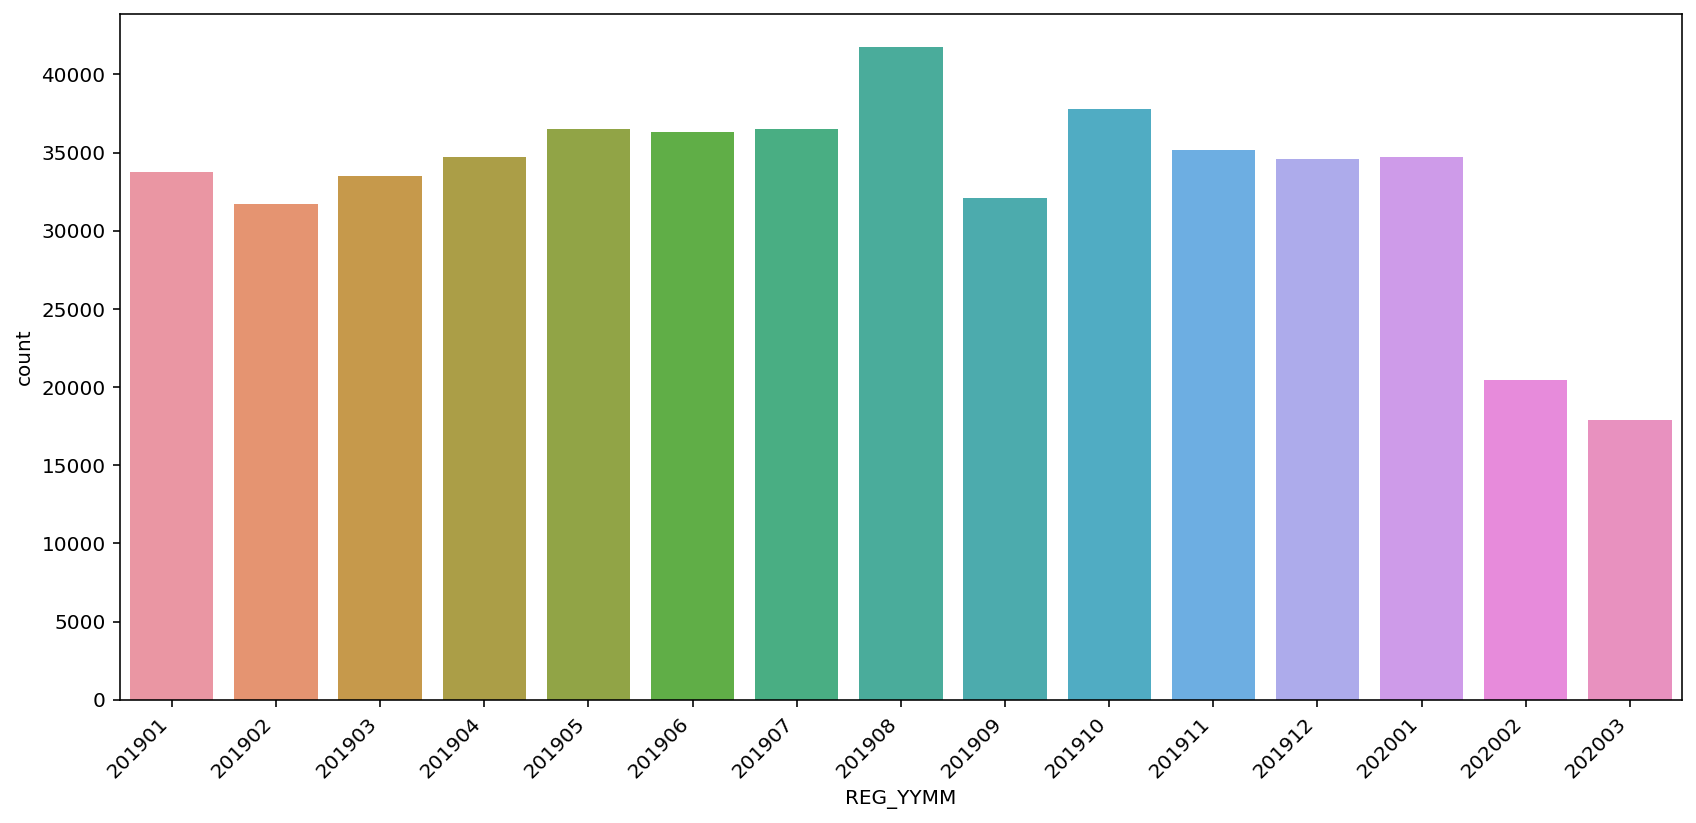

In [ ]:
fig = plt.figure(figsize=(14,7))
sns.countplot(jeju['REG_YYMM'])
fig.autofmt_xdate(rotation=45)

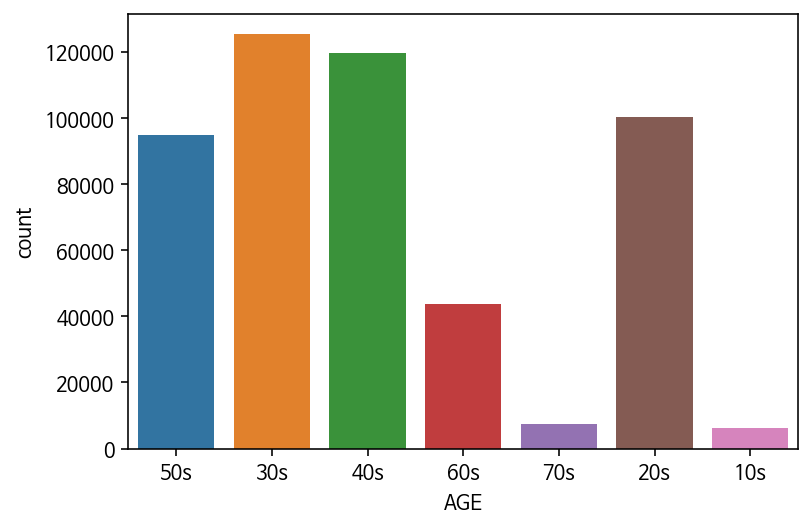

In [ ]:
sns.countplot(jeju['AGE'])

In [ ]:
jeju[jeju['CARD_SIDO_NM'] != jeju['HOM_SIDO_NM']].STD_CLSS_NM.value_counts()

한식 음식점업                  50993
체인화 편의점                  50670
면세점                      48189
서양식 음식점업                 23804
정기 항공 운송업                22660
수산물 소매업                  22063
차량용 주유소 운영업              20561
기타 대형 종합 소매업             20482
관광 민예품 및 선물용품 소매업        18666
과실 및 채소 소매업              18610
비알콜 음료점업                 18385
전시 및 행사 대행업              17849
피자 햄버거 샌드위치 및 유사 음식점업    17285
슈퍼마켓                     16406
자동차 임대업                  12459
내항 여객 운송업                11557
일식 음식점업                  11533
빵 및 과자류 소매업              10552
기타음식료품위주종합소매업             9187
여관업                       9082
휴양콘도 운영업                  6727
호텔업                       5695
골프장 운영업                   3076
그외 기타 종합 소매업              2226
화장품 및 방향제 소매업             2181
중식 음식점업                   2151
여행사업                      1686
욕탕업                       1679
육류 소매업                    1473
차량용 가스 충전업                1441
일반유흥 주점업                   992
스포츠 및 레크레이션 용품 임대업         891
기타 외국식 음

In [ ]:
len(jeju[jeju['STD_CLSS_NM']=='수산물 소매업'])/len(jeju)

0.046170575855823986

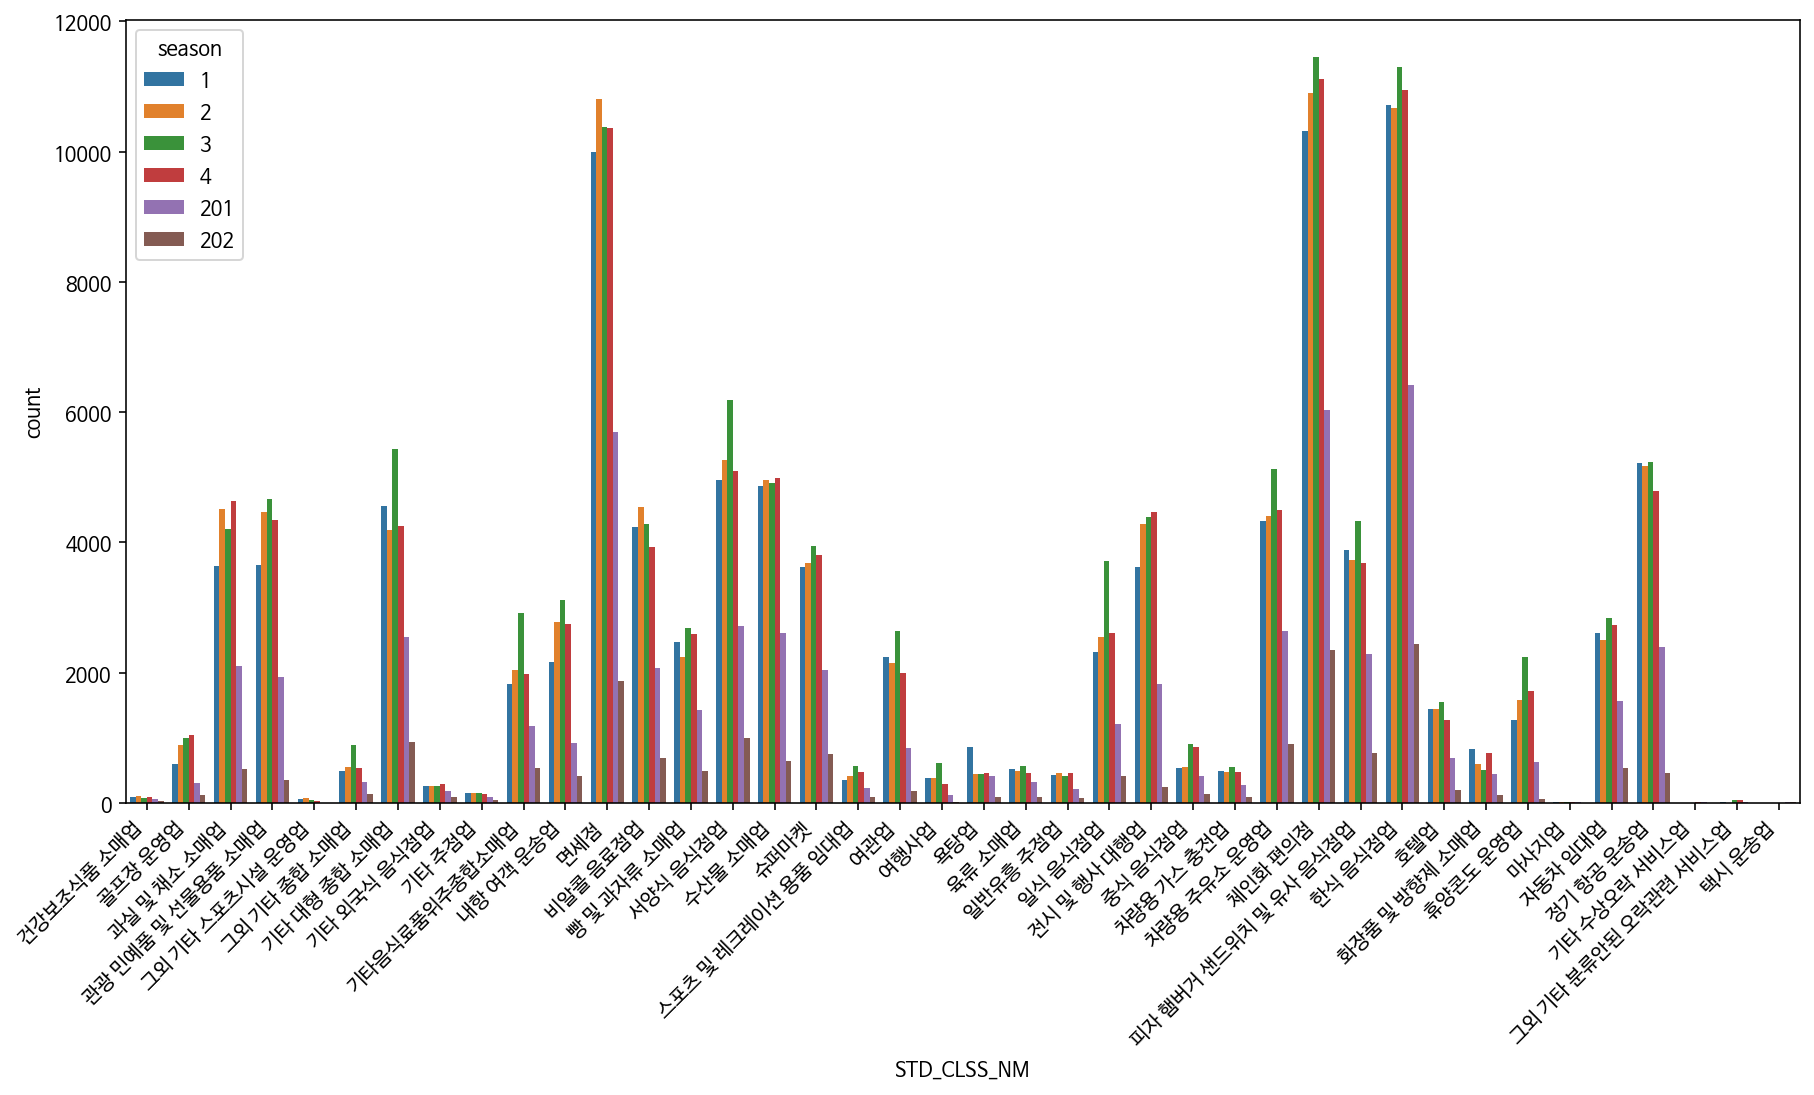

In [ ]:
fig = plt.figure(figsize=(15,8))
sns.countplot(jeju['STD_CLSS_NM'],hue=jeju['season'])
fig.autofmt_xdate(rotation=45)

In [ ]:
jeju.loc[jeju['STD_CLSS_NM']=='면세점']

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,year,month
1456881,201901,제주,서귀포시,면세점,강원,강릉시,50s,1,4,3,481870,9,2019,1
1456882,201901,제주,서귀포시,면세점,강원,원주시,30s,1,2,3,325600,5,2019,1
1456883,201901,제주,서귀포시,면세점,강원,인제군,60s,1,5,3,529320,7,2019,1
1456884,201901,제주,서귀포시,면세점,강원,춘천시,30s,2,2,3,435410,5,2019,1
1456885,201901,제주,서귀포시,면세점,강원,춘천시,40s,2,3,3,676980,6,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24589388,202003,제주,제주시,면세점,충북,충주시,20s,2,2,3,528810,3,2020,3
24589389,202003,제주,제주시,면세점,충북,충주시,30s,1,2,9,601260,12,2020,3
24589390,202003,제주,제주시,면세점,충북,충주시,40s,1,3,3,445340,5,2020,3
24589391,202003,제주,제주시,면세점,충북,충주시,50s,1,4,8,912880,12,2020,3


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/bac

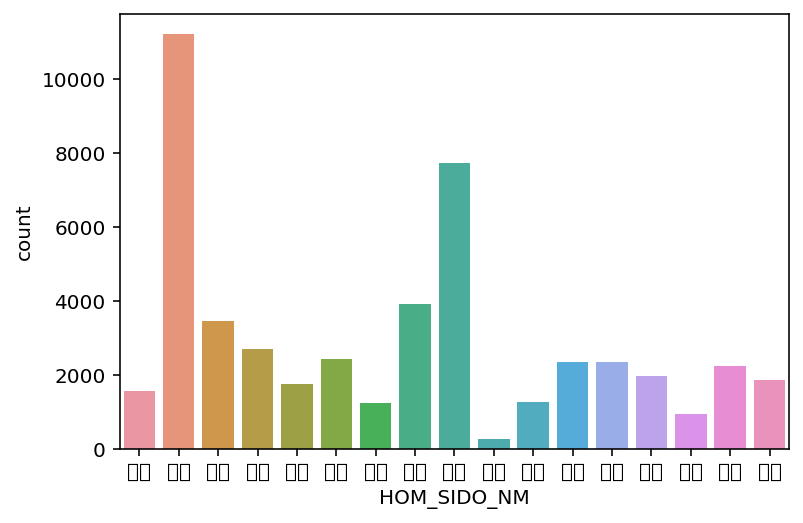

In [ ]:
sns.countplot(jeju.loc[jeju['STD_CLSS_NM']=='면세점','HOM_SIDO_NM'])

# 인천

In [ ]:
incheon = data[data['CARD_SIDO_NM']=='인천']

In [ ]:
incheon.shape

(1278410, 14)

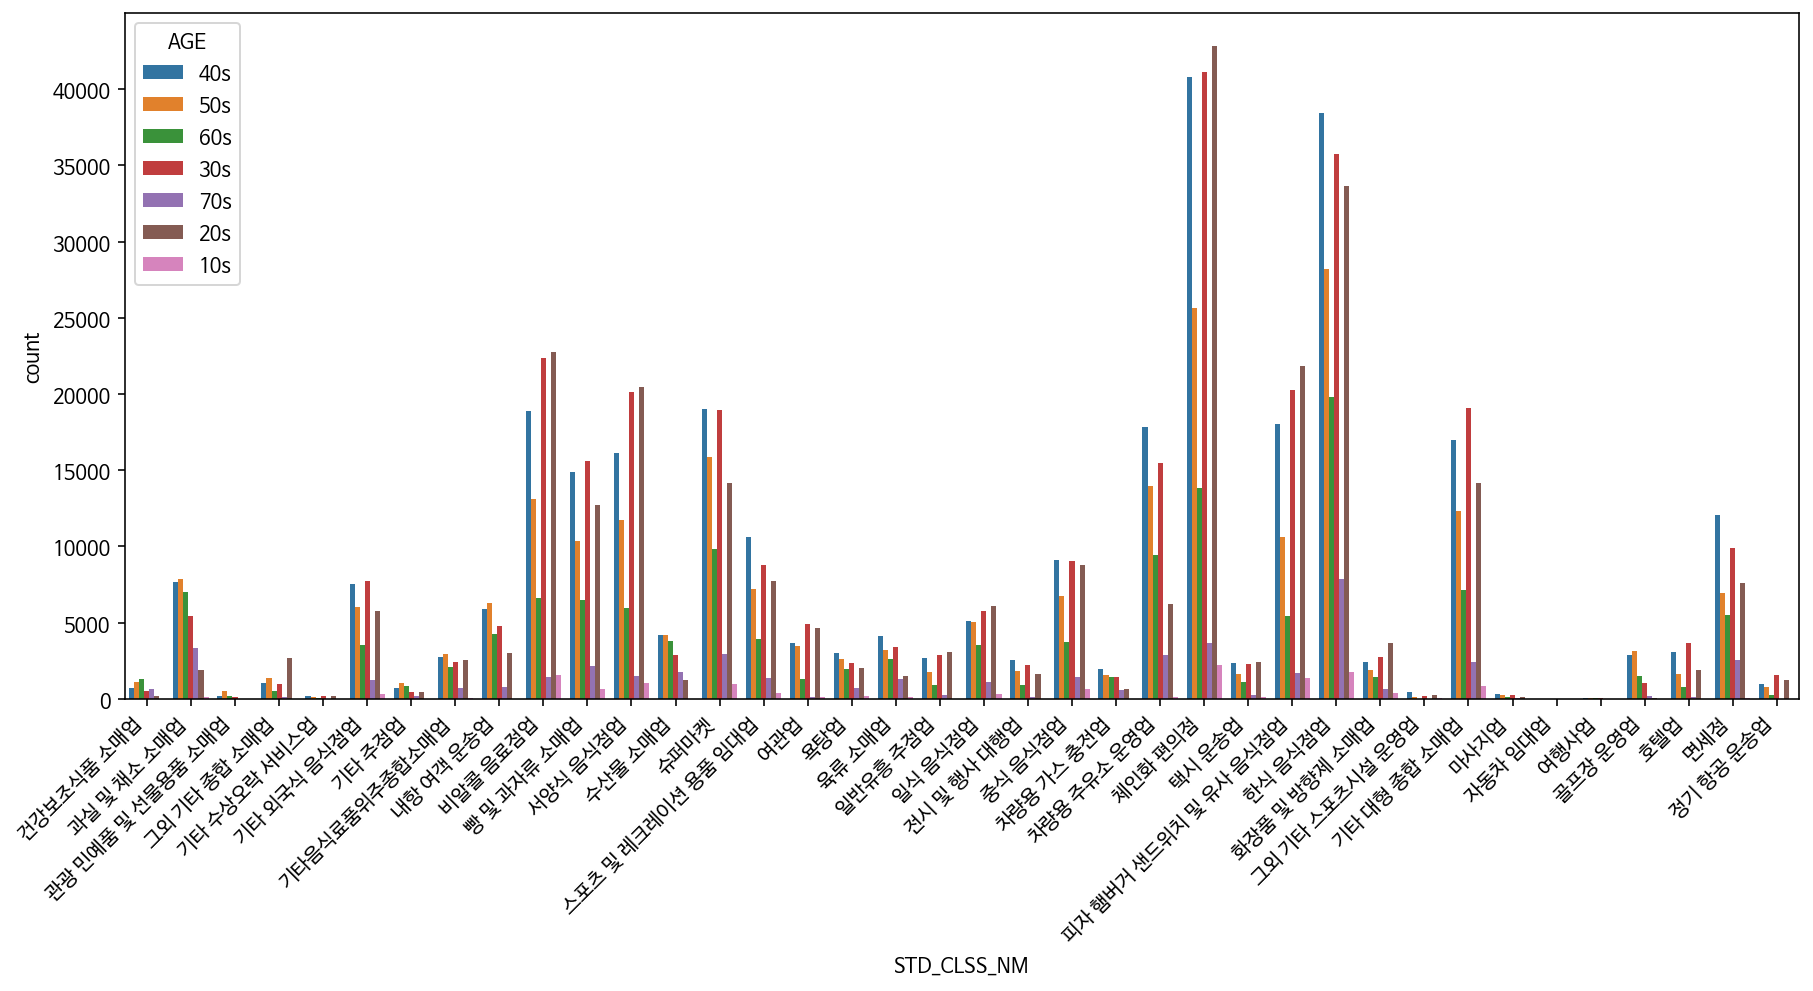

In [ ]:
fig = plt.figure(figsize=(15,7))
sns.countplot(incheon['STD_CLSS_NM'],hue=incheon['AGE'])
fig.autofmt_xdate(rotation=45)

In [ ]:
incheon['STD_CLSS_NM'].value_counts()

체인화 편의점                  170104
한식 음식점업                  165491
비알콜 음료점업                  86651
슈퍼마켓                      81726
피자 햄버거 샌드위치 및 유사 음식점업     79271
서양식 음식점업                  76893
기타 대형 종합 소매업              72955
차량용 주유소 운영업               65984
빵 및 과자류 소매업               62861
면세점                       44614
스포츠 및 레크레이션 용품 임대업        39977
중식 음식점업                   39483
과실 및 채소 소매업               33325
기타 외국식 음식점업               32196
일식 음식점업                   26994
내항 여객 운송업                 24924
여관업                       18352
수산물 소매업                   18103
육류 소매업                    16336
기타음식료품위주종합소매업             13570
화장품 및 방향제 소매업             13241
욕탕업                       12895
일반유흥 주점업                  11551
호텔업                       11150
택시 운송업                    10248
전시 및 행사 대행업                9340
골프장 운영업                    8855
차량용 가스 충전업                 7678
그외 기타 종합 소매업               6784
정기 항공 운송업                  4775
건강보조식품 소매업                 4411
기타 주점업  

In [ ]:
len(incheon[incheon['STD_CLSS_NM']=='수산물 소매업'])/len(incheon)

0.014160558819158174

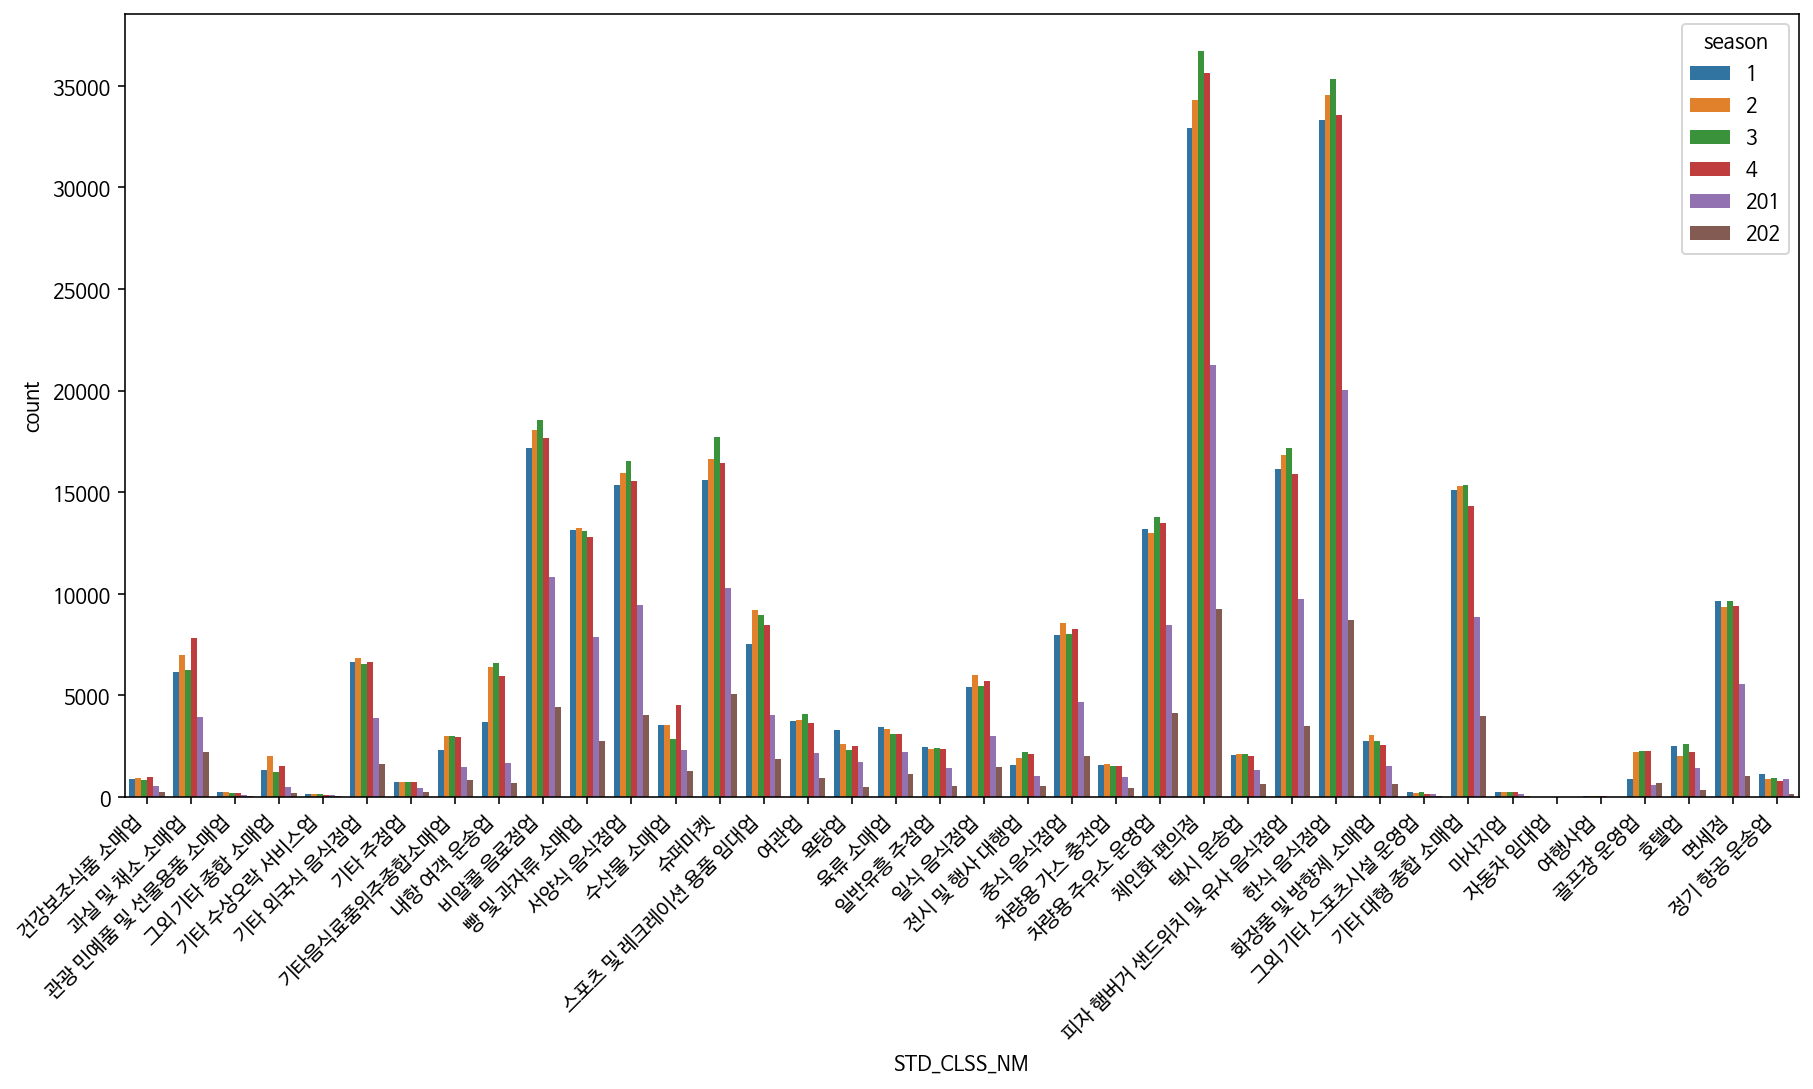

In [ ]:
fig = plt.figure(figsize=(15,8))
sns.countplot(incheon['STD_CLSS_NM'],hue=incheon['season'])
fig.autofmt_xdate(rotation=45)

## busan

In [ ]:
busan =data[data['CARD_SIDO_NM']=='부산']

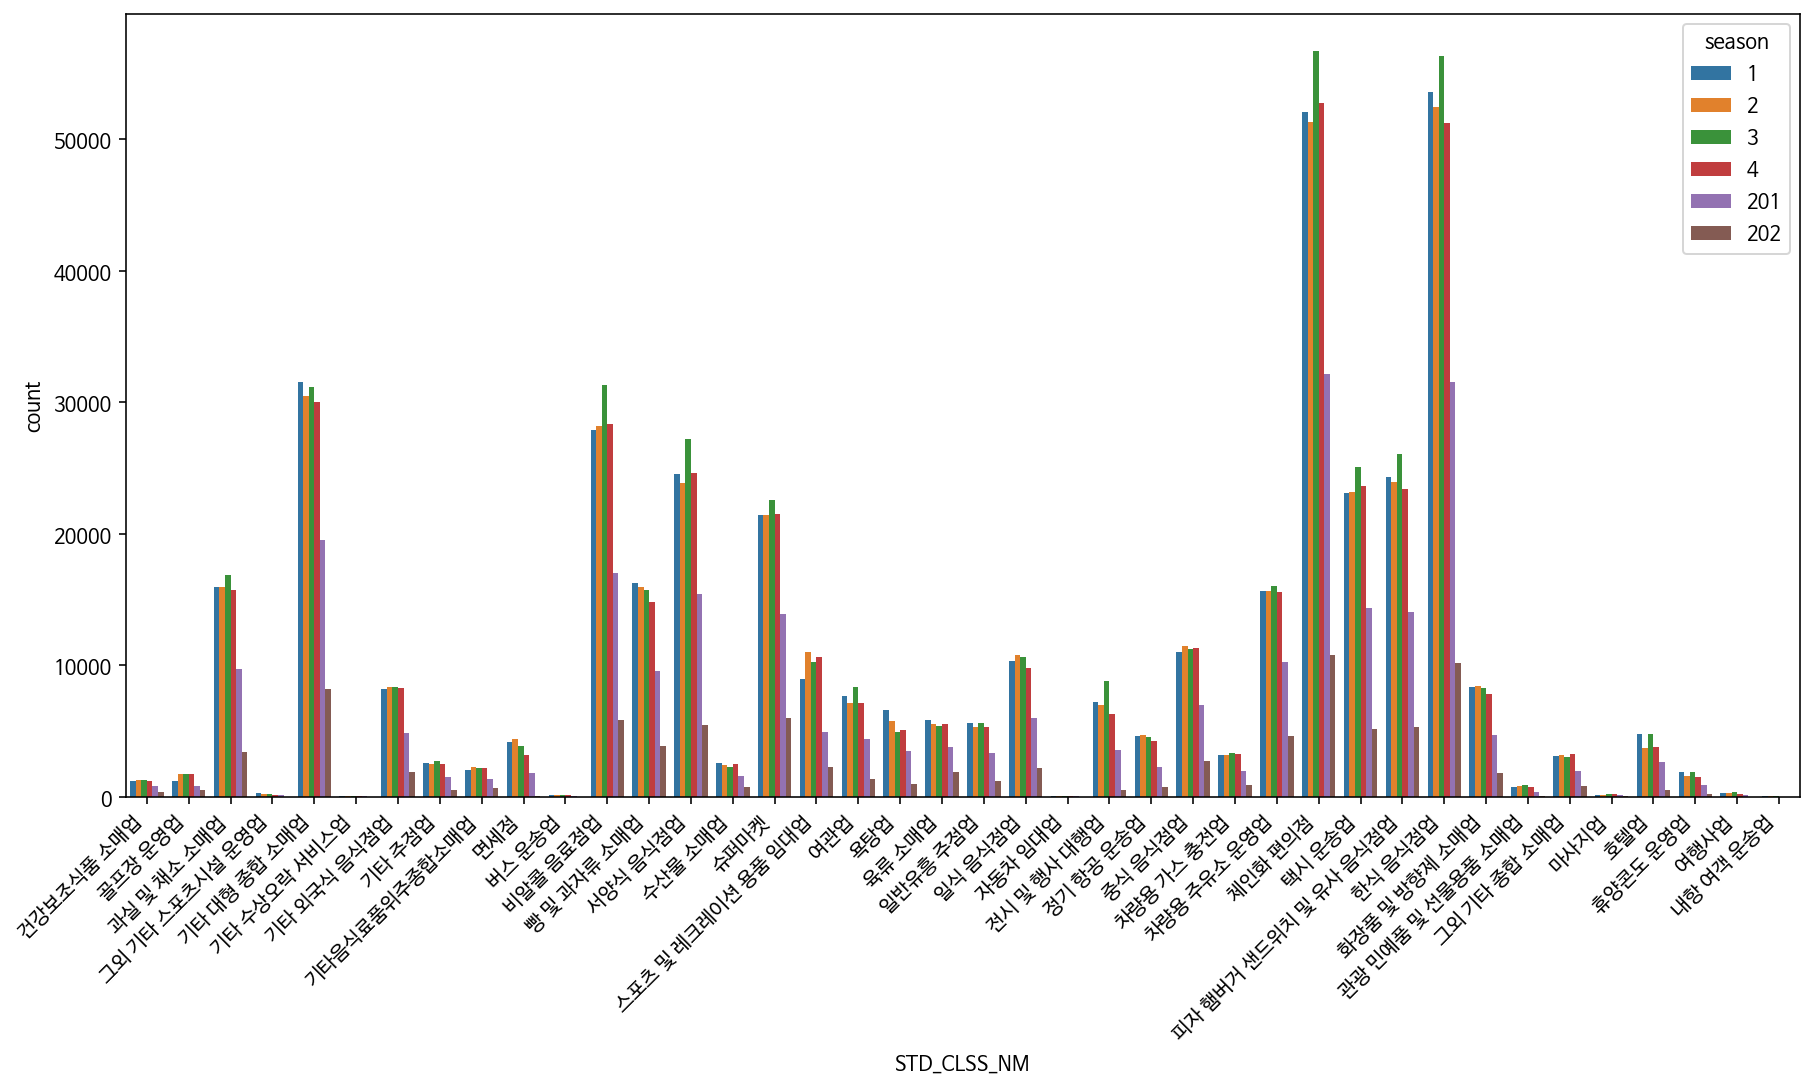

In [ ]:
fig = plt.figure(figsize=(15,8))
sns.countplot(busan['STD_CLSS_NM'],hue=busan['season'])
fig.autofmt_xdate(rotation=45)

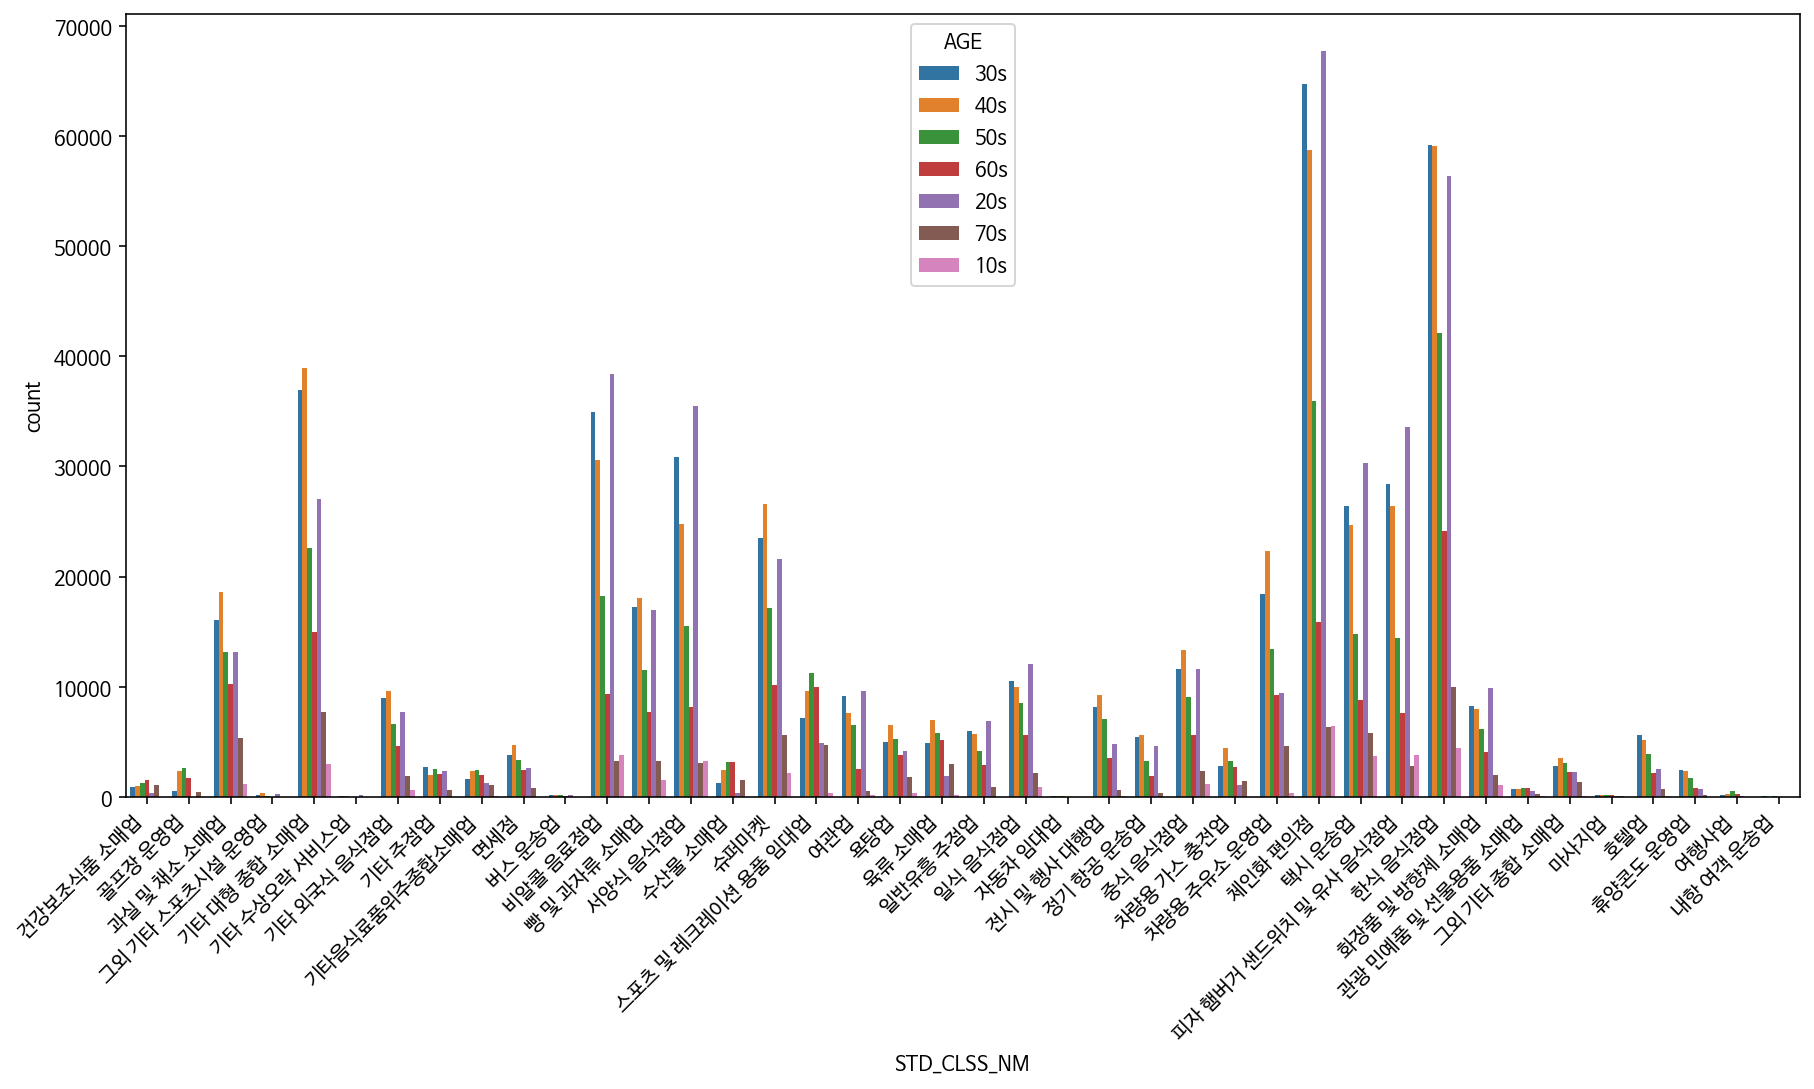

In [ ]:
fig = plt.figure(figsize=(15,8))
sns.countplot(busan['STD_CLSS_NM'],hue=busan['AGE'])
fig.autofmt_xdate(rotation=45)

In [ ]:
busan.columns

Index(['REG_YYMM', 'CARD_SIDO_NM', 'CARD_CCG_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM',
       'HOM_CCG_NM', 'AGE', 'SEX_CTGO_CD', 'FLC', 'CSTMR_CNT', 'AMT', 'CNT',
       'year', 'month', 'season'],
      dtype='object')

### 성별

In [ ]:
busan['SEX_CTGO_CD'].value_counts()

1    1142325
2     888485
Name: SEX_CTGO_CD, dtype: int64

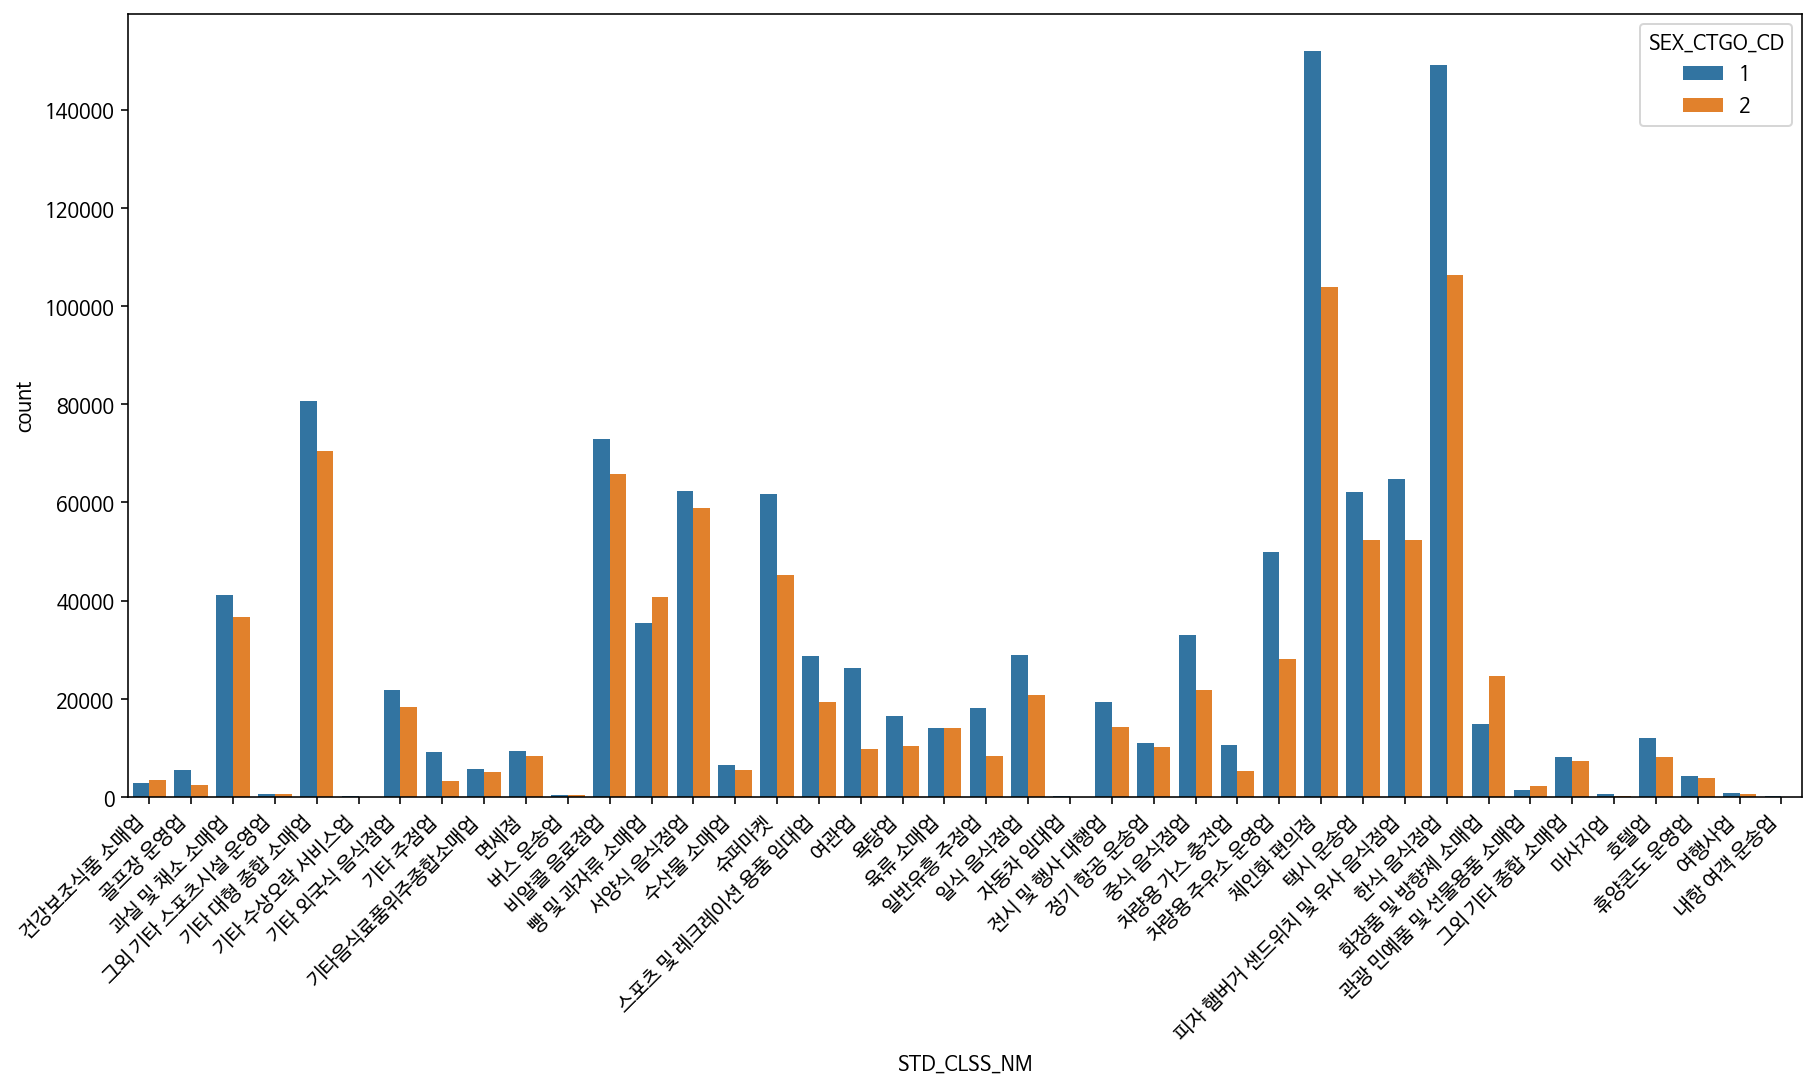

In [ ]:
fig = plt.figure(figsize=(15,8))
sns.countplot(busan['STD_CLSS_NM'],hue=busan['SEX_CTGO_CD'])
fig.autofmt_xdate(rotation=45)